In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
def num(s):
    try:
        return int(s)
    except ValueError:
        return 0

In [3]:
def get_colors():
    colors = [(31, 119, 180), (255,0,0), (0,255,0), (148, 103, 189),
                (140, 86, 75), (218, 73, 174), (127, 127, 127), (140,140,26), (23,
                190, 207), (65,200,100), (200, 65,100), (125,255,32), (32,32,198),
                (255,191,201), (172,191,201), (0,128,0), (244,130,150), (255,
                127, 14), (128,128,0), (10,10,10), (44, 160, 44), (214, 39, 40),
                (206,206,216)]
    
    for index in range(len(colors)):
        r, g, b = colors[index]
        colors[index] = (r/255., g/255., b/255.)
    
    return colors

In [4]:
def get_qb_names():
    qb_names = ['Peyton Manning']
    name = ''
    index = 0
    
    with open('./qb_data.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Name'] != name and qb_names[index] != row['Name'] :
                qb_names.append(row['Name'])
                index += 1
    
    return qb_names

In [5]:
def read_qb_data():
    with open('./qb_data.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        result_data = [row for row in reader]
        return result_data
    

In [6]:
fdata = []
prevy_sum = 0

In [7]:
qb_names = get_qb_names()
fdata = read_qb_data()

In [8]:
index = 0
rank = 0
lastyr = 0
highrank = 244
colors_data = get_colors()

In [9]:
fig = plt.figure(figsize = (15, 13))
ax = fig.add_subplot(111, axisbg = 'white')

/Users/hknam/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [10]:
plt.xlim(10, 744)
plt.ylim(1940, 2021)

(1940, 2021)

In [11]:
colindex = 0
lastage = 20

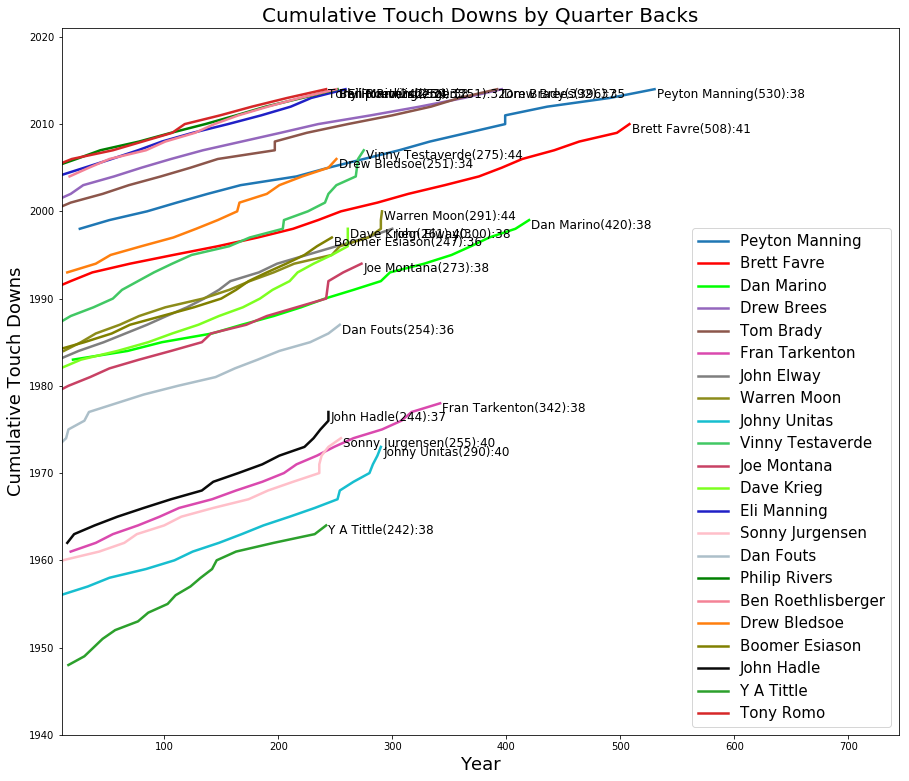

In [12]:
for qbn in qb_names:
    x = []
    y = []
    prevy_sum = 0
    
    for row in fdata:
        if row['Name'] == qbn and row['Year'] != 'Career':
            yrval = num(row['Year'])
            lastage = num(row['Age'])
            prevy_sum += num(row['TD'])
            lastyr = yrval
            y += [yrval]
            x += [prevy_sum]
            
    if rank < highrank:
        plt.plot(x, y, color = colors_data[colindex], label = qbn, linewidth = 2.5)
        plt.legend(loc = 4, prop = {'size':15})
        colindex = (colindex + 1) % 22
        #plt.text(lastyr-1, prevy_sum+2, qbn+"("+str(prevy_sum)+"):"+str(lastage), fontsize=9)
        plt.text(prevy_sum+2, lastyr-1, qbn+"("+str(prevy_sum)+"):"+str(lastage), fontsize=12)

    else:
        plt.plot(x, y, color = colors_data[22], linewidth = 1.5)
        rank += 1

plt.xlabel('Year', fontsize = 18)
plt.ylabel('Cumulative Touch Downs', fontsize = 18)
plt.title('Cumulative Touch Downs by Quarter Backs', fontsize = 20)

plt.show()